# Exercise 6.6 - TASK 

#### 1. Importing libraries and dataset
#### 2. Subsetting, wrangling and prepping the data for time-series analysis
#### 3. Time-series analysis: Decomposition
#### 4. Dickey Fuller testing for stationarity 
#### 5. Stationarizing the data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

In [2]:
# Set max_columns to None to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Creating the default 'path' for easier reference
path = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 6 - Advanced Analytics\Achievement 6 - Project'

In [4]:
# Importing the calendar dataset
df = pd.read_pickle(os.path.join(path, '02. Data\Modified\calendar_clean.pkl'))
df2 = pd.read_pickle(os.path.join(path, '02. Data\Modified\calendar_listings_clean.pkl'))

In [5]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,360,2023-06-30,f,135.0,135.0,30.0,60.0
1,360,2023-07-01,f,152.0,152.0,30.0,60.0
2,360,2023-07-02,f,133.0,133.0,30.0,60.0
3,360,2023-07-03,f,133.0,133.0,30.0,60.0
4,360,2023-07-04,f,133.0,133.0,30.0,60.0


In [6]:
df2.head()

,listing_id,date,available,daily_price,daily_adjusted_price,daily_min_nights,daily_max_nights,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,_merge
0,360,2023-06-30,f,135.0,135.0,30.0,60.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.0,5.0,5.0,4.91,2.99,both
1,360,2023-07-01,f,152.0,152.0,30.0,60.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.0,5.0,5.0,4.91,2.99,both
2,360,2023-07-02,f,133.0,133.0,30.0,60.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.0,5.0,5.0,4.91,2.99,both
3,360,2023-07-03,f,133.0,133.0,30.0,60.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.0,5.0,5.0,4.91,2.99,both
4,360,2023-07-04,f,133.0,133.0,30.0,60.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.0,5.0,5.0,4.91,2.99,both


In [7]:
df2.loc[df2['neighbourhood_cleansed'] == 'Five Points']

,listing_id,date,available,daily_price,daily_adjusted_price,daily_min_nights,daily_max_nights,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,_merge
365,364,2023-06-30,f,179.0,179.0,185.0,365.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.76672,-104.97906,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51,both
366,364,2023-07-01,f,179.0,179.0,185.0,365.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.76672,-104.97906,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51,both
367,364,2023-07-02,f,179.0,179.0,185.0,365.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.76672,-104.97906,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51,both
368,364,2023-07-03,f,179.0,179.0,185.0,365.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.76672,-104.97906,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51,both
369,364,2023-07-04,f,179.0,179.0,185.0,365.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.76672,-104.97906,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159194,54396026,2024-06-24,f,188.0,188.0,30.0,180.0,9681608,2013-10-28,"Saint Helena, CA",within an hour,100%,92%,t,Five Points,2,2,"Denver, Colorado, United States",Five Points,39.75084,-104.97636,Entire home,Entire home/apt,6,2 baths,3.0,3.0,160.0,30,180,30,30,180,180,30.0,180.0,t,0,0,0,83,39,20,1,2022-03-03,2023-06-09,4.97,4.97,4.95,5.00,5.00,4.82,4.87,2.41,both
1159195,54396026,2024-06-25,f,188.0,188.0,30.0,180.0,9681608,2013-10-28,"Saint Helena, CA",within an hour,100%,92%,t,Five Points,2,2,"Denver, Colorado, United States",Five Points,39.75084,-104.97636,Entire home,Entire home/apt,6,2 baths,3.0,3.0,160.0,30,180,30,30,180,180,30.0,180.0,t,0,0,0,83,39,20,1,2022-03-03,2023-06-09,4.97,4.97,4.95,5.00,5.00,4.82,4.87,2.41,both
1159196,54396026,2024-06-26,f,188.0,188.0,30.0,180.0,9681608,2013-10-28,"Saint Helena, CA",within an hour,100%,92%,t,Five Points,2,2,"Denver, Colorado, United States",Five Points,39.75084,-104.97636,Entire home,Entire home/apt,6,2 baths,3.0,3.0,160.0,30,180,30,30,180,180,30.0,180.0,t,0,0,0,83,39,20,1,2022-03-03,2023-06-09,4.97,4.97,4.95,5.00,5.00,4.82,4.87,2.41,both
115919

## 02. Subsetting, wrangling and prepping the data for time-series analysis

In [7]:
df3 = df2[['listing_id','date','daily_price','neighbourhood_cleansed','room_type']]

In [8]:
df3.head()

,listing_id,date,daily_price,neighbourhood_cleansed,room_type
0,360,2023-06-30,135.0,Highland,Entire home/apt
1,360,2023-07-01,152.0,Highland,Entire home/apt
2,360,2023-07-02,133.0,Highland,Entire home/apt
3,360,2023-07-03,133.0,Highland,Entire home/apt
4,360,2023-07-04,133.0,Highland,Entire home/apt


In [9]:
# Creating a subset of the data that just focuses on the top neighborhood based on number of listings (Five Points)
df4 = df3[df3['neighbourhood_cleansed'] == 'Five Points']

In [10]:
df4

,listing_id,date,daily_price,neighbourhood_cleansed,room_type
365,364,2023-06-30,179.0,Five Points,Entire home/apt
366,364,2023-07-01,179.0,Five Points,Entire home/apt
367,364,2023-07-02,179.0,Five Points,Entire home/apt
368,364,2023-07-03,179.0,Five Points,Entire home/apt
369,364,2023-07-04,179.0,Five Points,Entire home/apt
...,...,...,...,...,...
1159194,54396026,2024-06-24,188.0,Five Points,Entire home/apt
1159195,54396026,2024-06-25,188.0,Five Points,Entire home/apt
1159196,54396026,2024-06-26,188.0,Five Points,Entire home/apt
1159197,54396026,2024-06-27,191.0,Five Points,Entire home/apt


In [11]:
# Creating a new data frame to look at the average daily price across all listings in the Five Points neighborhood
average_prices_df = df4.groupby('date')['daily_price'].mean().reset_index().round(2)
average_prices_df.head()

,date,daily_price
0,2023-06-30,275.94
1,2023-07-01,282.83
2,2023-07-02,255.29
3,2023-07-03,244.34
4,2023-07-04,240.33


In [12]:
# Set the "date" column as the index

from datetime import datetime

average_prices_df['datetime'] = pd.to_datetime(average_prices_df['date'])
average_prices_df = average_prices_df.set_index('datetime')
average_prices_df.drop(['date'], axis=1, inplace=True) 
average_prices_df.head()

,daily_price
datetime,
2023-06-30,275.94
2023-07-01,282.83
2023-07-02,255.29
2023-07-03,244.34
2023-07-04,240.33


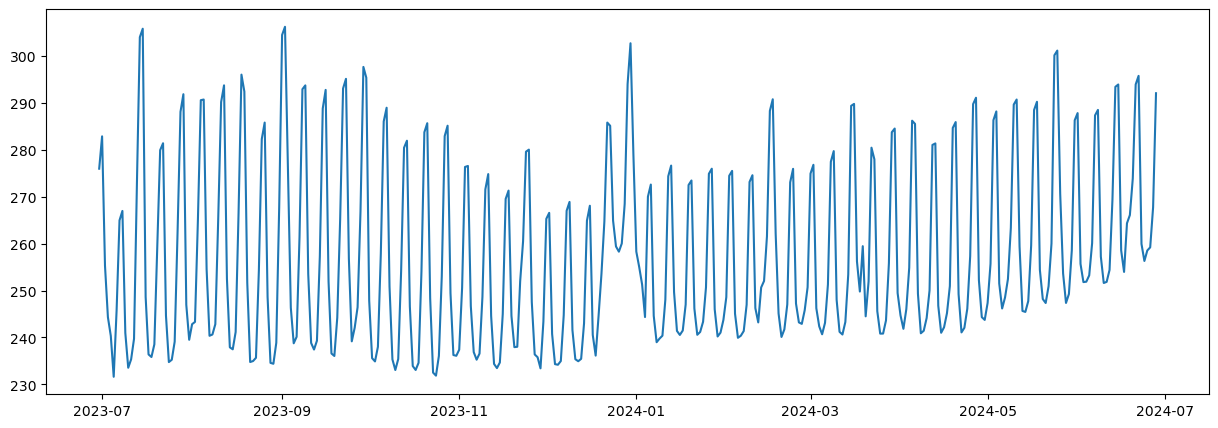

In [13]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(average_prices_df)

## 03. Time-series analysis: Decomposition

In [14]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(average_prices_df, model='additive')

In [15]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

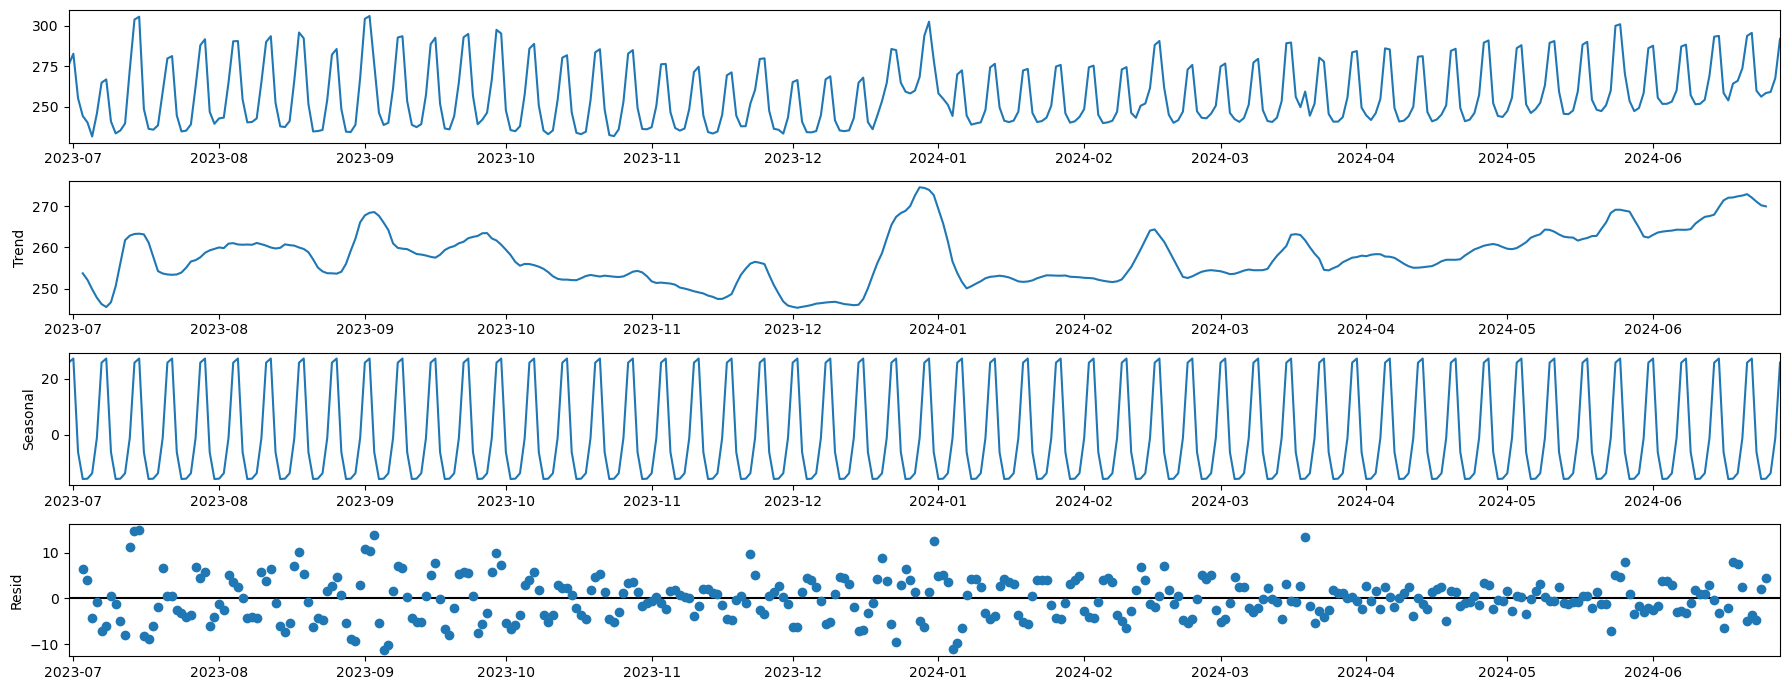

In [16]:
# Plot the separate components

decomposition.plot()
plt.show()

### Looking over the decomposition of the time-series, I am seeing a few things. First, the intial graph appears to be stationairy as we look at the data over time. The 'trend' graph further supports our findings here, except for the holidays around the end of the month of December. We can see a huge spike in pricing right around Christmas / New Years. The seasonality of the time-series is very universal, which makes sense and is good to see. Lastly, the noise of the time-series is all over the place! This means that there are a lot of random fluctuations in the data that don’t significantly contribute to its underlying trend. This might be of slight concern, but given my other findings from my analysis, pricing tends to be all over the place without a concrete variable to nail down in predicting it. 

## 04. Dickey Fuller testing for stationarity 

In [17]:
# Running the Dickey Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(average_prices_df['daily_price'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.554407
p-value                          0.102791
Number of Lags Used             16.000000
Number of Observations Used    348.000000
Critical Value (1%)             -3.449282
Critical Value (5%)             -2.869881
Critical Value (10%)            -2.571214
dtype: float64


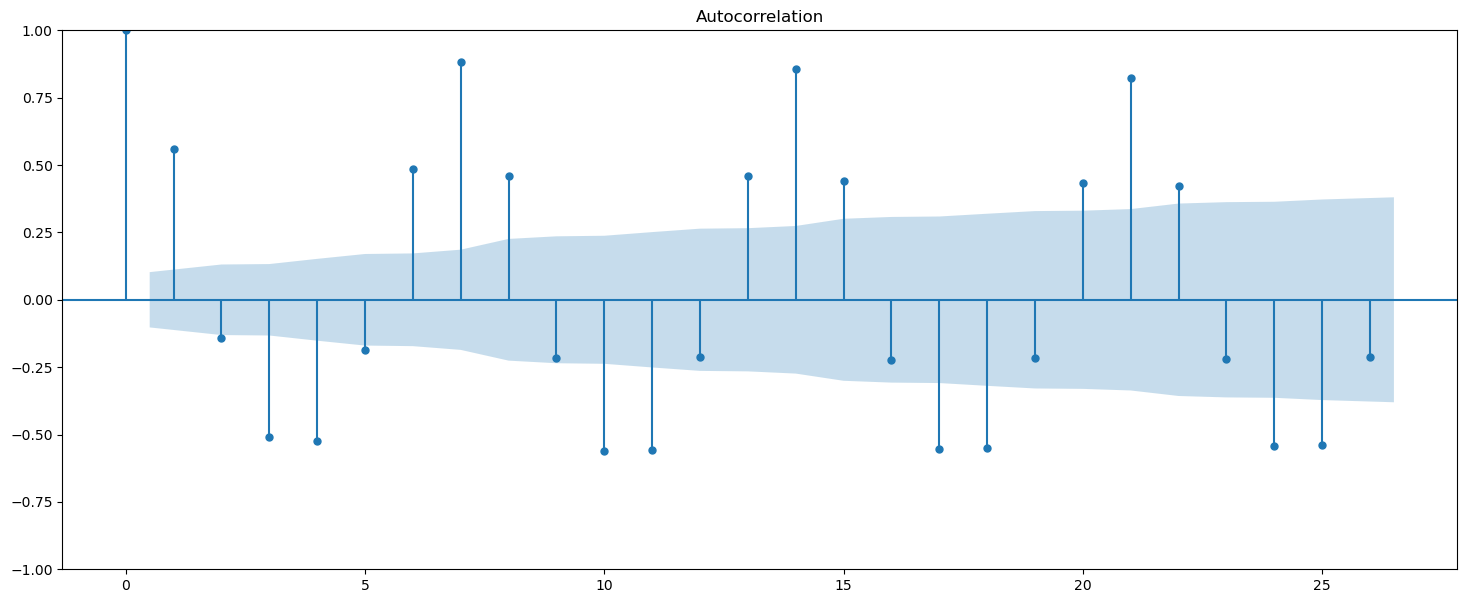

In [18]:
# A plot of autocorrelation for the data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(average_prices_df)
plt.show()

### Based on the Dickey Fuller test, our critical values are less than our test statitic, at all % levels. This means that there is a unit root in the data, and that our data is non-stationary. 

## 05. Stationarizing the data

In [19]:
data_diff = average_prices_df - average_prices_df.shift(1)

In [20]:
# Dropping any null values that result from the calculation
data_diff.dropna(inplace = True)

In [21]:
data_diff.head()

,daily_price
datetime,
2023-07-01,6.89
2023-07-02,-27.54
2023-07-03,-10.95
2023-07-04,-4.01
2023-07-05,-8.70


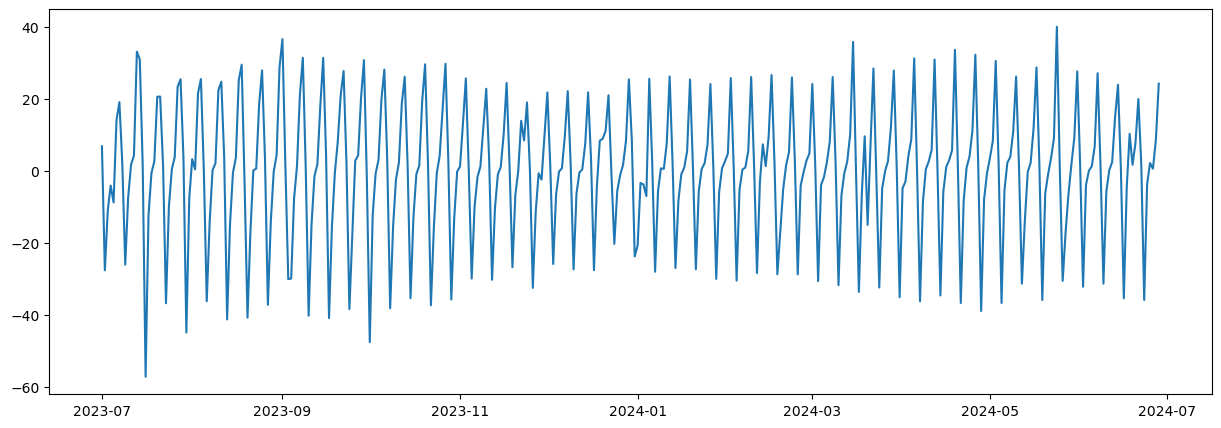

In [22]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [23]:
# Checking the Dickey Fuller test again after differencing the data
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.514624e+00
p-value                        1.079033e-08
Number of Lags Used            1.500000e+01
Number of Observations Used    3.480000e+02
Critical Value (1%)           -3.449282e+00
Critical Value (5%)           -2.869881e+00
Critical Value (10%)          -2.571214e+00
dtype: float64


### The results from this test are much different than before. The test statistic is much much lower than any of the critical values, which means that we have stationary data!

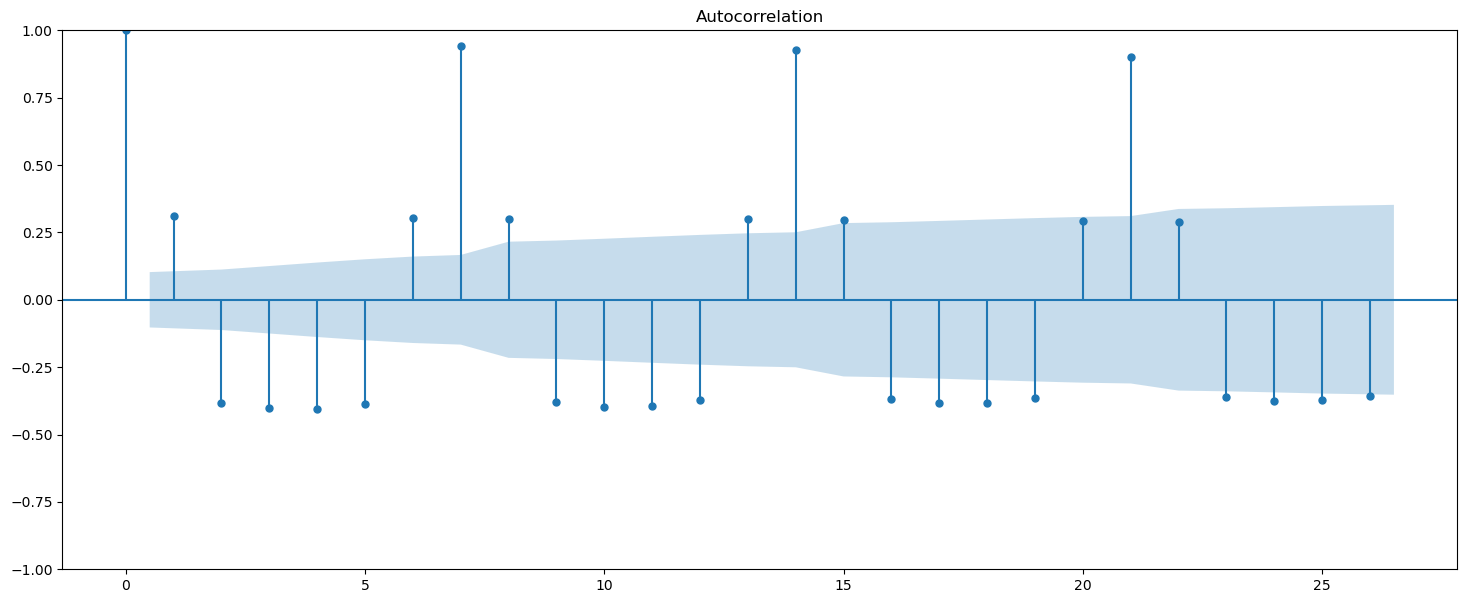

In [24]:
# Rechecking autocorrelation after the data has been determined to be stationary. 
plot_acf(data_diff)
plt.show()